#Selección del set de datos

##Descripción
El dataset "Nike Adidas Shoes for Image Classification" es un conjunto de datos recopilado y compartido en Kaggle por el usuario Ifeanyi Nneji. Este dataset se creó específicamente para la clasificación de imágenes de zapatos de las marcas Nike y Adidas. Las imágenes se extrajeron de bing usando bing_image_search de pypi, se descargaron 400 imágenes de cada clase y luego el conjunto de datos se recortó a 300 (se eliminaron algunas imágenes no relacionadas en el proceso de compilación del conjunto de datos). A continuación, se proporcionarann una descripción detallada del dataset:

* **Tamaño del dataset:** El dataset contiene un total de 576 imágenes en formato .jpg de tenis nike y adidas. Divididos de la siguiente manera:
 * Train: 230 nike y 230 adidas.
 * Test: 30 nike y 30 adidas.
 * Validation: 28 nike y 27 adidas.

* **Distribución de clases:** El dataset está equilibrado, lo que significa que hay una cantidad igual de imágenes de zapatos Nike y Adidas. Esto asegura que tu modelo de clasificación pueda aprender de manera justa y precisa para ambas marcas.

* **Anotaciones:** Cada imagen está etiquetada correctamente con la marca correspondiente, es decir, si es un zapato Nike o un zapato Adidas. Estas etiquetas son cruciales para entrenar un modelo de machine learning capaz de diferenciar entre ambas marcas.

* **Variedad de imágenes:** El dataset contiene una variedad de imágenes de zapatos, incluyendo diferentes estilos, colores y ángulos de visualización. Esto ayudará a tu modelo a capturar las características distintivas de cada marca y realizar una clasificación precisa.

* **Calidad de las imágenes:** Las imágenes del dataset tienen una resolución razonablemente alta y una calidad visual adecuada para el propósito de clasificación. Sin embargo, es posible que se encuentre algunas variaciones en la calidad debido a la diversidad de fuentes y condiciones de captura.



In [1]:
#Dataset: https://www.kaggle.com/datasets/ifeanyinneji/nike-adidas-shoes-for-image-classification-dataset?select=validation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd "/content/drive/MyDrive/IA/AdidasNike"
!ls

/content/drive/MyDrive/IA/AdidasNike
AdidasNike.ipynb  CNN_shoes.h5	  test	 validation
CNN_shoes1.h5	  labelnames.csv  train


In [4]:
import os
import numpy as np
import pandas as pd
import cv2 
import matplotlib.pyplot as plt 

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.models import save_model

In [5]:
labelnames = pd.read_csv('labelnames.csv')
labelnames.head()

,Name,Label
0,aadidas_ (10),Adidas
1,aadidas_ (11),Adidas
2,aadidas_ (12),Adidas
3,aadidas_ (13),Adidas
4,aadidas_ (14),Adidas


In [6]:
labelnames.describe()

,Name,Label
count,576,576
unique,576,2
top,aadidas_ (10),Nike
freq,1,289


In [7]:
nikeNum = len(labelnames[labelnames['Label'] == 'Nike'])
print("Numero de fotos de Nike: ", nikeNum)

Numero de fotos de Nike:  289


In [8]:
AdidasNum = len(labelnames[labelnames['Label'] == 'Adidas'])
print("Numero de fotos de Adidas: ", AdidasNum)

Numero de fotos de Adidas:  287


#Preprocesado de los datos

In [9]:
base_dir = "/content/drive/MyDrive/IA/AdidasNike"

In [10]:
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [11]:
nb_train_samples = 460
nb_validation_samples = 55
nb_test_samples = 60
epochs = 50
batch_size = 20

En el proceso de entrenamiento, empleamos ImageDataGenerator para crear imágenes adicionales en la memoria RAM, evitando así el derroche de espacio.

In [12]:
train_datagen = ImageDataGenerator(
							rescale=1. / 255,
							shear_range=0.2,
							zoom_range=0.2,
							horizontal_flip=True)

In [13]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (224, 224),
							batch_size = batch_size,
							class_mode ='binary')

Found 460 images belonging to 2 classes.


<Figure size 640x480 with 0 Axes>

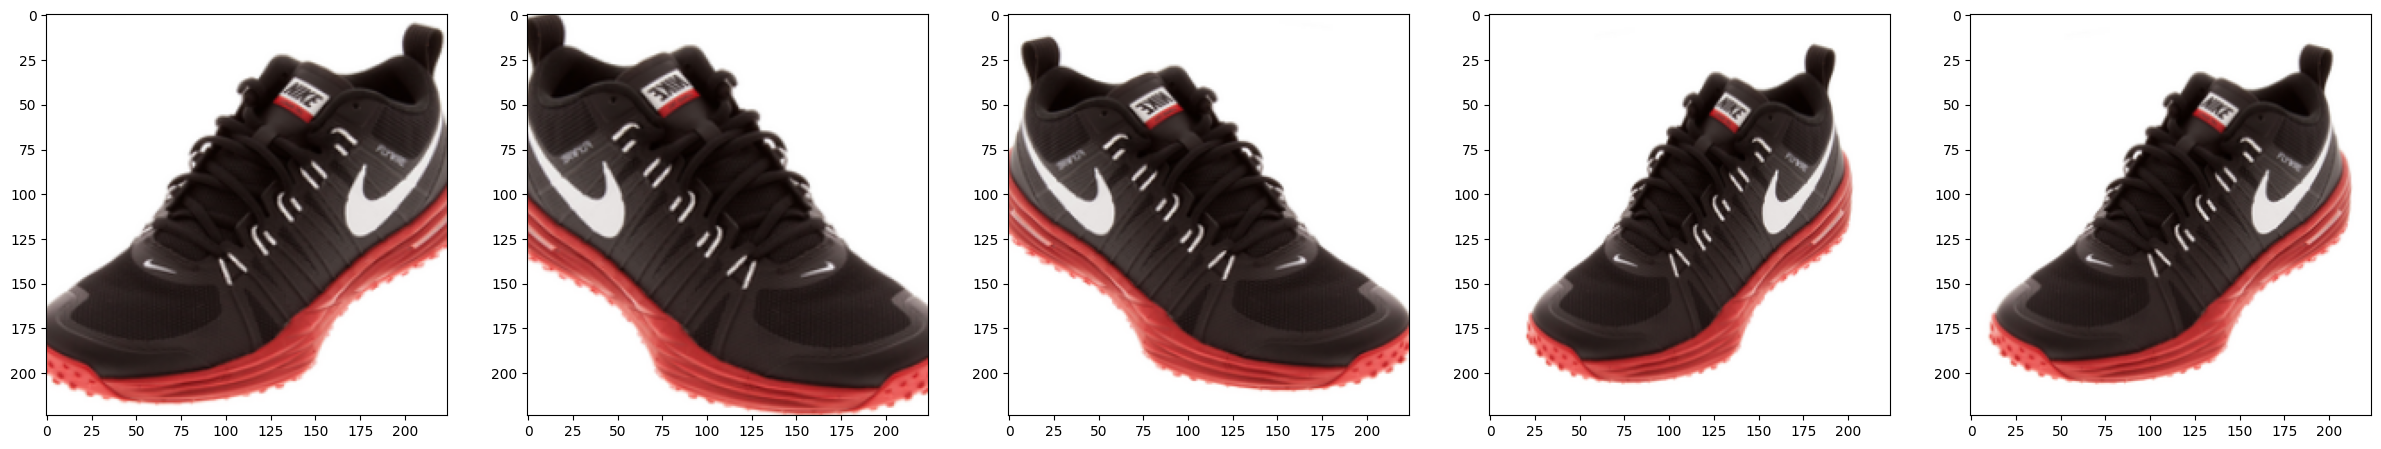

In [14]:
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8)) 

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

(20, 224, 224, 3)
[1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0.]


<Figure size 640x480 with 0 Axes>

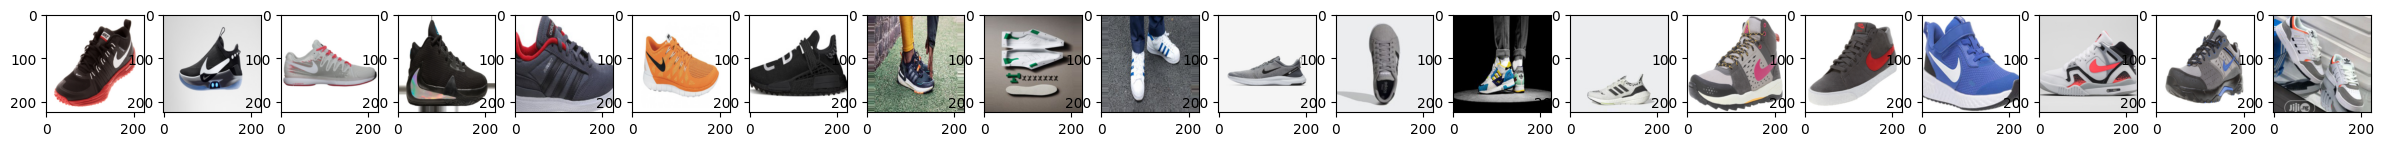

In [15]:
images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 8)) 

for i in range(images.shape[0]) :  
  axarr[i].imshow(images[i])

In [16]:
val_datagen = ImageDataGenerator(rescale=1. / 255)
val_generator = val_datagen.flow_from_directory(
							validation_dir,
							target_size = (224,224),
							batch_size = batch_size,
							class_mode= 'binary')

Found 55 images belonging to 2 classes.


#Implementación de Modelo

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_6 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                  

In [18]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

<ipython-input-18-6f38a6e68fae>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
18/23 [======================>.......] - ETA: 9s - loss: 1.3708 - accuracy: 0.4833 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


23/23 [==============================] - 45s 2s/step - loss: 1.2229 - accuracy: 0.4848 - val_loss: 0.6834 - val_accuracy: 0.5750
Epoch 2/50
23/23 [==============================] - 40s 2s/step - loss: 0.7111 - accuracy: 0.5674 - val_loss: 0.6846 - val_accuracy: 0.5500
Epoch 3/50
23/23 [==============================] - 41s 2s/step - loss: 0.6921 - accuracy: 0.5826 - val_loss: 0.6632 - val_accuracy: 0.7500
Epoch 4/50
23/23 [==============================] - 41s 2s/step - loss: 0.7211 - accuracy: 0.6261 - val_loss: 0.6877 - val_accuracy: 0.5250
Epoch 5/50
23/23 [==============================] - 41s 2s/step - loss: 0.6636 - accuracy: 0.6130 - val_loss: 0.6258 - val_accuracy: 0.6750
Epoch 6/50
23/23 [==============================] - 41s 2s/step - loss: 0.6628 - accuracy: 0.6326 - val_loss: 0.6630 - val_accuracy: 0.6000
Epoch 7/50
23/23 [==============================] - 41s 2s/step - loss: 0.7312 - accuracy: 0.6022 - val_loss: 0.6459 - val_accuracy: 0.6250
Epoch 8/50
23/23 [=============

In [19]:
model.save('CNN_shoes1.h5')

#Evaluación inicial del modelo

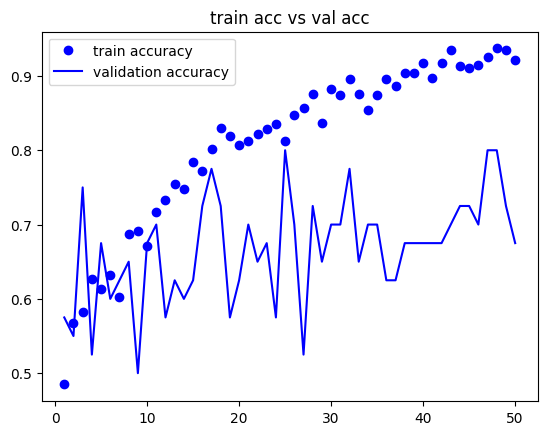

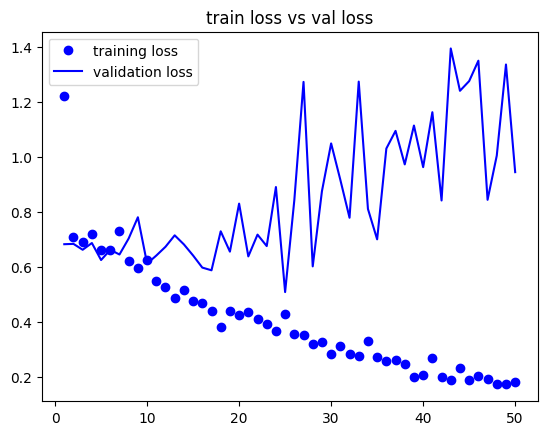

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs,val_loss, 'b', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

In [21]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (224, 224),
					batch_size = batch_size,
					class_mode= 'binary')

Found 60 images belonging to 2 classes.


In [22]:
test_loss, test_acc = model.evaluate(test_generator, steps = nb_test_samples // batch_size)
print('\ntest acc :\n', test_acc)
print('\ntest loss :\n', test_loss)

3/3 [==============================] - 1s 373ms/step - loss: 0.8250 - accuracy: 0.7500

test acc :
 0.75

test loss :
 0.8249521255493164


#Mejorar el modelo

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

from keras.optimizers import RMSprop
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model.summary()

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 activation_28 (Activation)  (None, 222, 222, 64)      0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 109, 109, 128)     73856     
                                                                 
 activation_29 (Activation)  (None, 109, 109, 128)     0         
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 54, 54, 128)      0         
 g2D)                                                 

<ipython-input-44-7efca04559f9>:38: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
17/23 [=====================>........] - ETA: 48s - loss: 11.5073 - accuracy: 0.4794

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


23/23 [==============================] - 189s 8s/step - loss: 8.6864 - accuracy: 0.4783 - val_loss: 0.6876 - val_accuracy: 0.5500
Epoch 2/50
23/23 [==============================] - 186s 8s/step - loss: 0.7006 - accuracy: 0.4739 - val_loss: 0.6923 - val_accuracy: 0.5250
Epoch 3/50
23/23 [==============================] - 191s 8s/step - loss: 0.7295 - accuracy: 0.5239 - val_loss: 0.7327 - val_accuracy: 0.4750
Epoch 4/50
23/23 [==============================] - 191s 8s/step - loss: 1.1688 - accuracy: 0.5000 - val_loss: 0.6843 - val_accuracy: 0.4750
Epoch 5/50
23/23 [==============================] - 192s 8s/step - loss: 0.6894 - accuracy: 0.5587 - val_loss: 0.7007 - val_accuracy: 0.5500
Epoch 6/50
23/23 [==============================] - 186s 8s/step - loss: 0.9140 - accuracy: 0.6109 - val_loss: 0.8943 - val_accuracy: 0.5250
Epoch 7/50
23/23 [==============================] - 186s 8s/step - loss: 0.7021 - accuracy: 0.6109 - val_loss: 1.0456 - val_accuracy: 0.4500
Epoch 8/50
23/23 [======

In [ ]:
model1.save('CNN_shoes2.h5')